In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
df = pd.read_excel('Overdose Penn.xlsx',sheet_name='Overdose_Information_Network_Da')

In [4]:
df.head()

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,...,Revive Action Desc,Third Party Admin Desc,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude
0,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
1,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
2,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
3,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
4,26,2018-01-26,09:14:00,Friday,Chester,Pennsylvania,5,Male,25 - 29,White,...,NaN,NaN,29,39.974871,-75.756265,29,39.974871,-75.756265,"(39.974871, -75.756265)","(39.974871, -75.756265)"


In [5]:
opiod_list = ['CARFENTANIL','FENTANYL','FENTANYL ANALOG/OTHER SYNTHETIC OPIOID','HEROIN','METHADONE','PHARMACEUTICAL OPIOID','SUBOXONE']

<h2> Mesuring Overall effectivness

In [6]:
###limiting to opioids
opdf = df.loc[df['Susp OD Drug Desc'].isin(opiod_list)]

In [7]:
opdf

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,...,Revive Action Desc,Third Party Admin Desc,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude
2,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
3,1,2018-01-04,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
4,26,2018-01-26,09:14:00,Friday,Chester,Pennsylvania,5,Male,25 - 29,White,...,NaN,NaN,29,39.974871,-75.756265,29,39.974871,-75.756265,"(39.974871, -75.756265)","(39.974871, -75.756265)"
5,27,2018-01-24,23:32:00,Wednesday,Beaver,Pennsylvania,4,Male,30 - 39,White,...,NaN,NaN,7,40.683492,-80.351074,7,40.683492,-80.351074,"(40.683492, -80.351074)","(40.683492, -80.351074)"
6,28,2018-01-15,23:41:00,Monday,Bucks,Pennsylvania,6,Male,25 - 29,White,...,NaN,NaN,17,40.335011,-75.112912,91,40.209899,-75.372520,"(40.335011, -75.112912)","(40.209899, -75.37252)"
7,29,2018-01-15,10:54:00,Monday,Bucks,Pennsylvania,7,Female,30 - 39,White,...,NaN,NaN,17,40.335011,-75.112912,17,40.335011,-75.112912,"(40.335011, -75.112912)","(40.335011, -75.112912)"
8,30,2018-01-01,13:07:00,Monday,Philadelphia,Pennsylvania,8,Male,50 - 59,White,...,NaN,NaN,101,40.004444,-75.140236,17,40.335011,-75.112912,"(40.004444, -75.140236)","(40.335011, -75.112912)"
9,31,2018-01-31,09:27:00,Wednesday,Washington,Pennsylvania,9,Unknown,30 - 39,Unknown,...,NaN,NaN,125,40.191097,-80.251801,Unknown,0.000000,0.000000,"(40.191097, -80.251801)","(0.0, 0.0)"
10,32,2018-01-24,00:01:00,Wednesday,Cumberland,Pennsylvania,14,Male,30 - 39,White,...,NaN,NaN,41,40.167598,-77.268663,41,40.167598,-77.268663,"(40.167598, -77.268663)","(40.167598, -77.268663)"
11,32,2018-01-24,00:01:00,Wednesday,Cumberland,Pennsylvania,14,Male,30 - 39,White,...,NaN,NaN,41,40.167598,-77.268663,41,40.167598,-77.268663,"(40.167598, -77.268663)","(40.167598, -77.268663)"


<b> There a duplicates because some over doses include multiple opioids. Also, there are duplicates when a thrid part administers Naloxon etc limiting collumn and removing duplicates

In [8]:
opdf = opdf[['Incident ID','Incident Date','Victim ID','Gender Desc','Naloxone Administered','Age Range','Survive','Response Desc']]

In [9]:
opdf = opdf.drop_duplicates()

In [10]:
opdf.head()

,Incident ID,Incident Date,Victim ID,Gender Desc,Naloxone Administered,Age Range,Survive,Response Desc
2,1,2018-01-04,1,Male,Y,50 - 59,N,NO RESPONSE TO NALOXONE
4,26,2018-01-26,5,Male,N,25 - 29,N,NaN
5,27,2018-01-24,4,Male,N,30 - 39,Y,NaN
6,28,2018-01-15,6,Male,N,25 - 29,Y,NaN
7,29,2018-01-15,7,Female,N,30 - 39,Y,NaN


In [11]:
### Removing 80 - * because there is only one
## Removing Unknown survival.
opdf = opdf.loc[opdf['Age Range'] != '80 - *']
opdf = opdf.loc[opdf['Survive'] != 'U']

In [12]:
opdf.head()

,Incident ID,Incident Date,Victim ID,Gender Desc,Naloxone Administered,Age Range,Survive,Response Desc
2,1,2018-01-04,1,Male,Y,50 - 59,N,NO RESPONSE TO NALOXONE
4,26,2018-01-26,5,Male,N,25 - 29,N,NaN
5,27,2018-01-24,4,Male,N,30 - 39,Y,NaN
6,28,2018-01-15,6,Male,N,25 - 29,Y,NaN
7,29,2018-01-15,7,Female,N,30 - 39,Y,NaN


In [13]:
opdf['Age Count'] = opdf.groupby(['Age Range'])[['Age Range']].transform('count')

In [14]:
newopdf = opdf.groupby('Age Range')['Naloxone Administered'].apply(lambda x: (x=='Y').sum()).reset_index(name='Naloxone Admin Count')

In [15]:
opdf['Nal Admin By Age'] = opdf[opdf['Naloxone Administered'] == 'Y'].groupby('Age Range')['Naloxone Administered'].transform('count')

In [16]:
######## Survival rate counts all
opdf[opdf['Survive'] == 'Y'].groupby('Age Range')['Survive'].count()

Age Range
0 - 9         8
15 - 19      77
20 - 24     838
25 - 29    1583
30 - 39    2432
40 - 49     855
50 - 59     470
60 - 69     120
70 - 79      21
Name: Survive, dtype: int64

In [17]:
### Survial Rates by Naloxone Administered

opdf[opdf['Survive'] == 'Y'].groupby(['Age Range','Naloxone Administered'])[['Survive']].count()

Survive
Age Range Naloxone Administered         
0 - 9     N                            2
          Y                            6
15 - 19   N                           14
          Y                           63
20 - 24   N                          199
          Y                          639
25 - 29   N                          389
          Y                         1194
30 - 39   N                          530
          Y                         1902
40 - 49   N                          209
          Y                          646
50 - 59   N                          104
          Y                          366
60 - 69   N                           20
          Y                          100
70 - 79   N                            6
          Y                           15

In [18]:
## .size and . count are the same
opdf[opdf['Survive'] == 'Y'].groupby(['Age Range','Naloxone Administered']).size()

Age Range  Naloxone Administered
0 - 9      N                           2
           Y                           6
15 - 19    N                          14
           Y                          63
20 - 24    N                         199
           Y                         639
25 - 29    N                         389
           Y                        1194
30 - 39    N                         530
           Y                        1902
40 - 49    N                         209
           Y                         646
50 - 59    N                         104
           Y                         366
60 - 69    N                          20
           Y                         100
70 - 79    N                           6
           Y                          15
dtype: int64

In [18]:
### Looking at both Survived and not. It seems like the survial rate increased with Naloxone
grp = opdf.groupby(['Age Range','Naloxone Administered','Survive']).size()

In [19]:
grp

Age Range  Naloxone Administered  Survive
0 - 9      N                      N             1
                                  Y             2
           Y                      Y             6
15 - 19    N                      N            10
                                  Y            14
           Y                      N             6
                                  Y            63
20 - 24    N                      N           111
                                  Y           199
           Y                      N            29
                                  Y           639
25 - 29    N                      N           217
                                  Y           389
           Y                      N            78
                                  Y          1194
30 - 39    N                      N           386
                                  Y           530
           Y                      N           149
                                  Y          1902
40 - 49 

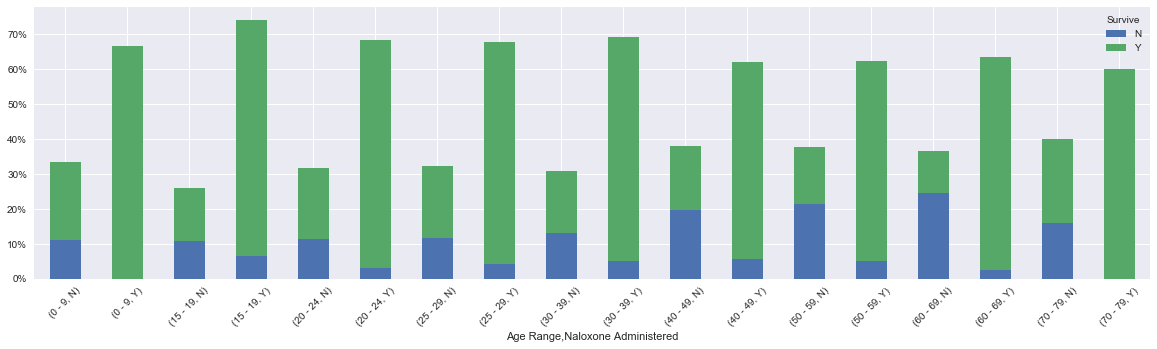

In [92]:
### Plotting a stacked bar chart


import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

opdf.groupby(['Age Range','Naloxone Administered','Survive']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

<b> The % is by age group, and the stacked bar format is not intiituve, trying regular bar

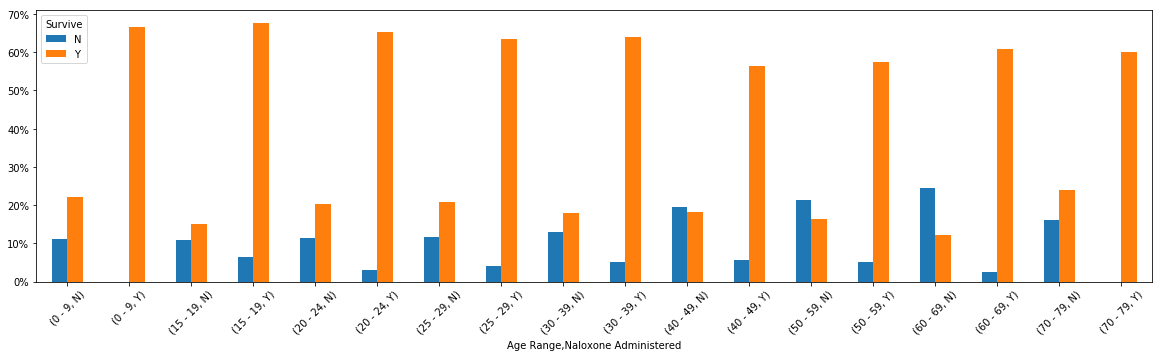

In [21]:
### Plotting a regular bar cart

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
#plt.xticks(rotation=45)
opdf.groupby(['Age Range','Naloxone Administered','Survive']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

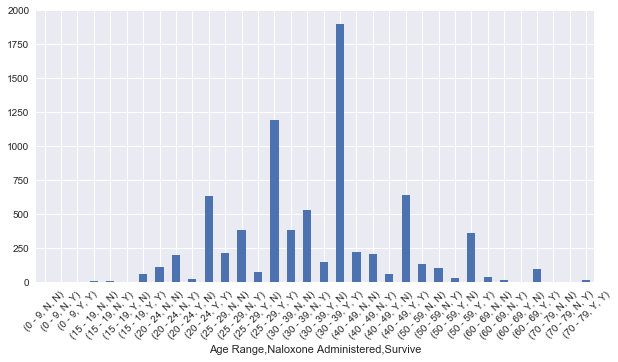

In [88]:
### Plotting a regular bar cart

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
#plt.xticks(rotation=45)
opdf.groupby(['Age Range','Naloxone Administered','Survive']).size().plot(kind='bar')


plt.xticks(rotation=45)
plt.show()

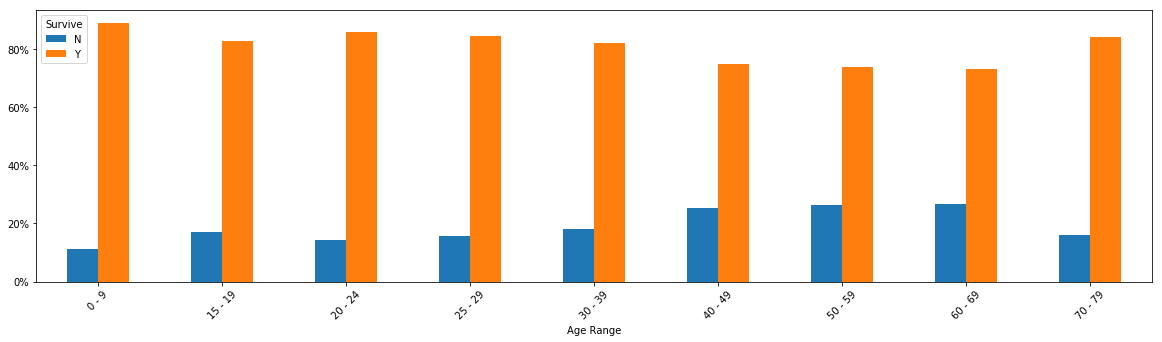

In [24]:
### all over survival rates by  age range

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
#plt.xticks(rotation=45)
opdf.groupby(['Age Range','Survive']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

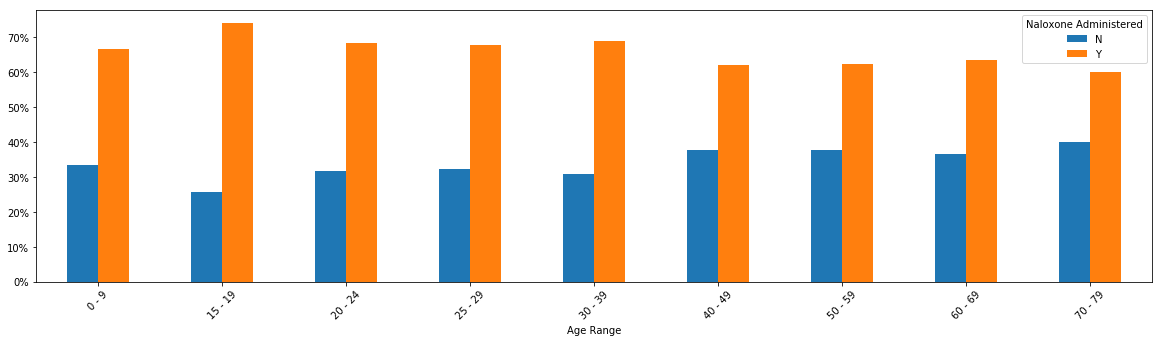

In [25]:
### Naloxone admin rates

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
#plt.xticks(rotation=45)
opdf.groupby(['Age Range','Naloxone Administered']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

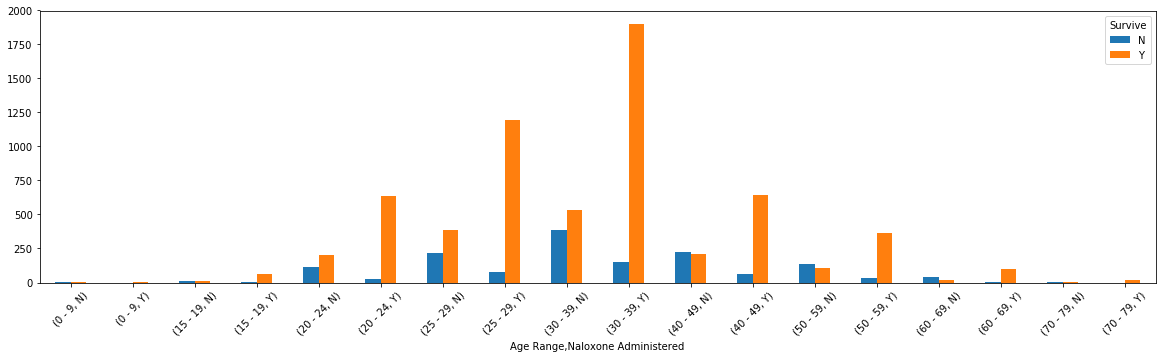

In [37]:
### Numbers not percents

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
#plt.xticks(rotation=45)
opdf.groupby(['Age Range','Naloxone Administered','Survive']).size().unstack().plot(kind='bar')

#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

In [38]:
#### Creating 2 dataframes one fore survive, one for not.
opdfsury = opdf.loc[opdf['Survive'] == 'Y']
opdfsurn = opdf.loc[opdf['Survive'] == 'N']



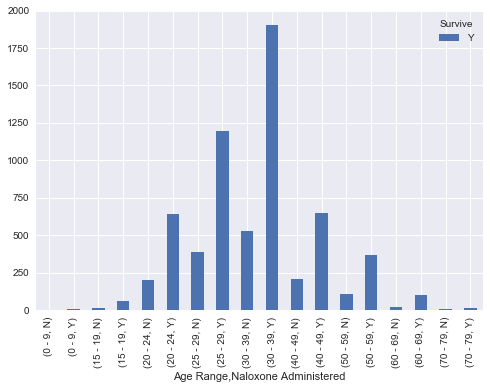

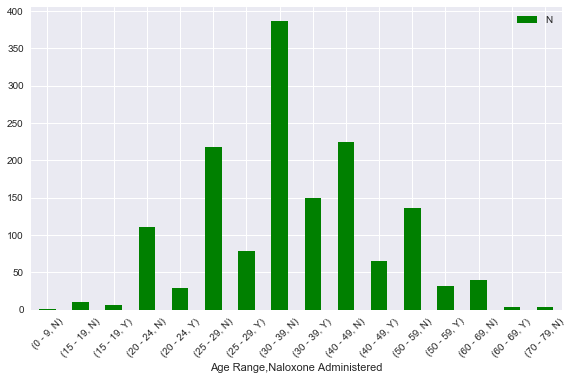

In [79]:
### Numbers not percents



### instansated a figue.
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

rate = opdf[['Age Range','Naloxone Administered','Survive']]
plt.rcParams["figure.figsize"] = (20,5)

plt.style.use('seaborn')
#plt.xticks(rotation=45)
x = opdfsury.groupby(['Age Range','Naloxone Administered','Survive']).size().unstack().plot(kind='bar')
y = opdfsurn.groupby(['Age Range','Naloxone Administered','Survive']).size().unstack().plot(kind='bar',color = 'g')
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

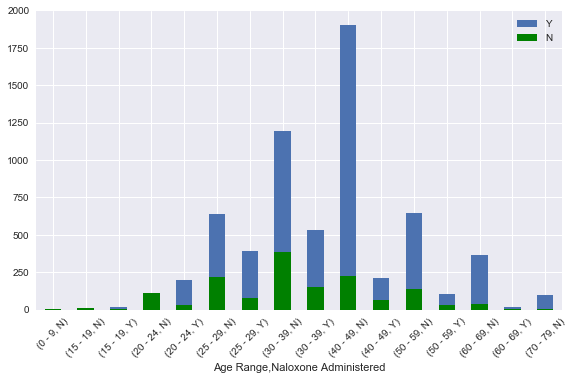

In [75]:
### Numbers not percents



### instansated a figue.
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
bar_width = 0.35
rate = opdf[['Age Range','Naloxone Administered','Survive']]
plt.rcParams["figure.figsize"] = (20,5)

plt.style.use('seaborn')
#plt.xticks(rotation=45)
x = opdfsury.groupby(['Age Range','Naloxone Administered','Survive']).size().unstack()
y = opdfsurn.groupby(['Age Range','Naloxone Administered','Survive']).size().unstack()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())



ax = x.plot(kind = 'bar')
y.plot(ax=ax,  kind = 'bar',color = 'g')


plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [24]:
##### Exporting to Excel spreadsheet
from pandas import ExcelWriter

writer = ExcelWriter('opdf.xlsx')
opdf.to_excel(writer,'opdf')

writer.save()

In [25]:
### get % by age range